# Project 1: Do you know the happiest place on earth?

---

## Group Members: Melina Tinoco, Alexia Guevara, Joshua Leavitt, Leo Antinozzi

### Project Description/Outline:

#### We will use this data set to analyze the most and least happy countries and continents. This analysis will be conducted using the overall happiness rating, and seek to find correlations between happiness and other factors such as Per Capita GDP, Generosity, Healthy Life Expectancy, etc.. 

#### Questions to be answered: See Proposal PDF or Readme

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import seaborn as sns


happiness_data_path = "Resources/world-happiness-report.csv"
happiness_data_2021_path = "Resources/world-happiness-report-2021.csv"

happiness_data = pd.read_csv(happiness_data_path)
happiness_data_2021 = pd.read_csv(happiness_data_2021_path)


In [95]:
#Define Regression Model
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regression_vals = x_values * slope + intercept
    regression_line= "y = " + str((slope,2)) + "x + " + str((intercept,2))
   
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regression_vals,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(regression_line, text_coordinates, fontsize=20, color="blue")
    plt.title(title)


In [96]:
#Create DataFrame for CSV 
happiness_df = pd.DataFrame(happiness_data)
happiness_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [97]:
#Create DataFrame for CSV 
happiness_2021_df = pd.DataFrame(happiness_data_2021)
happiness_2021_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


---

### What is the happiest country?

In [98]:
#Code for Happiest Country
happiest_countries = happiness_2021_df.copy()
happiest_country_df = pd.DataFrame(happiest_countries)

happiest_country_clean_df = happiest_country_df.iloc[:,[0,1,2]].copy()

happiest = happiest_country_df.loc[happiest_country_df['Ladder score'].idxmax()]

happiest_mean = happiest_country_df['Ladder score'].mean()

happiest_median = happiest_country_df['Ladder score'].median()

happiest = happiest['Country name']

print(f"The happiest country in the world is {happiest}")
print(f"The mean and meadian Happines Ladder scores are {happiest_mean} and {happiest_median} respectively")
happiest_country_clean_df.sort_values('Ladder score', ascending=False).head()

happiest_country_clean_df.to_csv('Output_figs/Happiest_country_clean.csv')
happiest_country_clean_df.sort_values('Ladder score', ascending=False).head()


The happiest country in the world is Finland
The mean and meadian Happines Ladder scores are 5.532838926174497 and 5.534 respectively


,Country name,Regional indicator,Ladder score
0,Finland,Western Europe,7.842
1,Denmark,Western Europe,7.620
2,Switzerland,Western Europe,7.571
3,Iceland,Western Europe,7.554
4,Netherlands,Western Europe,7.464


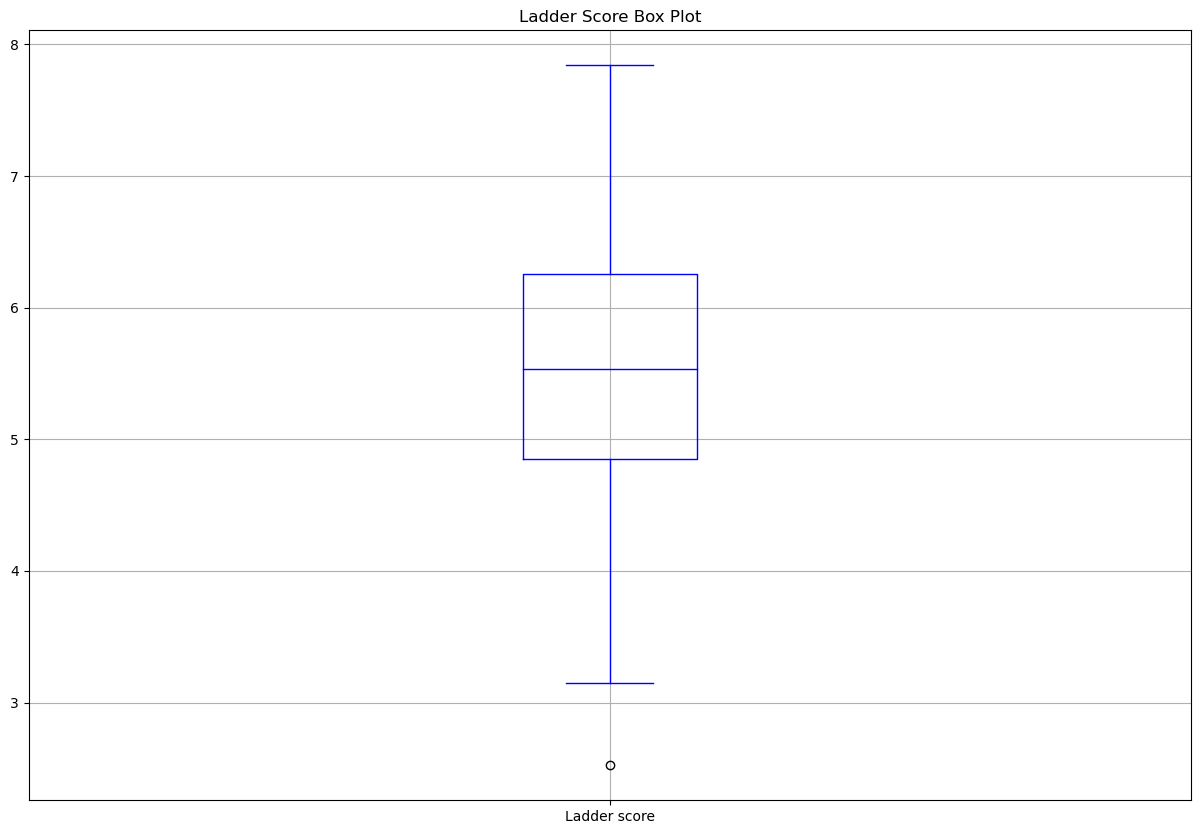

In [99]:
#Box Plot for ladder/happiness scores
bplt = happiest_country_clean_df.boxplot(column = 'Ladder score', color="blue")

plt.title('Ladder Score Box Plot')

plt.savefig("Output_figs/BoxPlot.png")

plt.show()

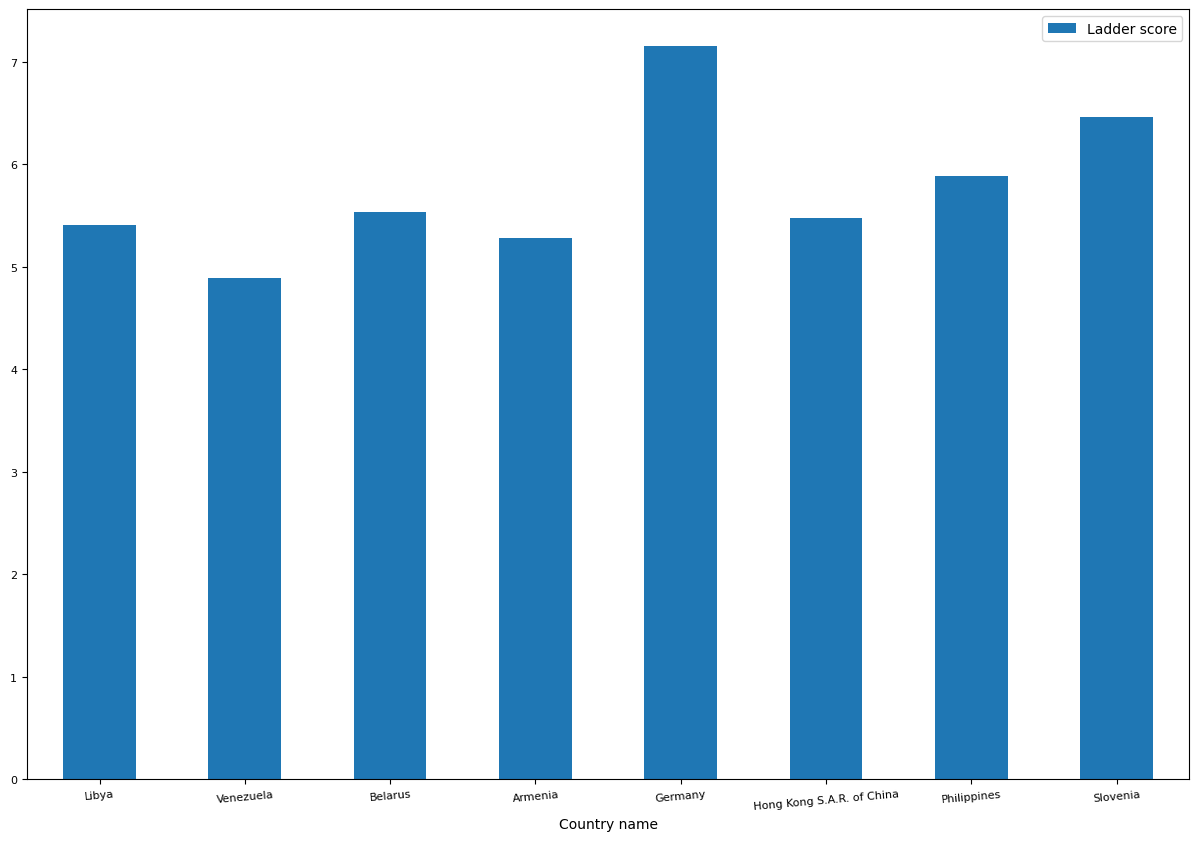

In [100]:
#Plot Happiness by Country samples
happy_country_plot = happiest_country_clean_df.sort_values('Ladder score', ascending=False).sample(8)


happy_country_plot.plot(x="Country name", y="Ladder score", kind="bar", rot=5, fontsize=8)

plt.savefig('Output_figs/Happiness_graph.png')

plt.show()

### What is the least happy country? 

In [101]:
#Data Frame for the least happy country
unhappiest = happiness_2021_df.loc[happiness_2021_df['Ladder score'].idxmin()]
unhappiest_country_df = happiness_2021_df[['Country name', 'Ladder score']]
unhappiest = unhappiest['Country name']
print(f"The unhappiest country in the world is {unhappiest}")
unhappiest_country_df.sort_values('Ladder score', ascending=True).head()

The unhappiest country in the world is Afghanistan


,Country name,Ladder score
148,Afghanistan,2.523
147,Zimbabwe,3.145
146,Rwanda,3.415
145,Botswana,3.467
144,Lesotho,3.512


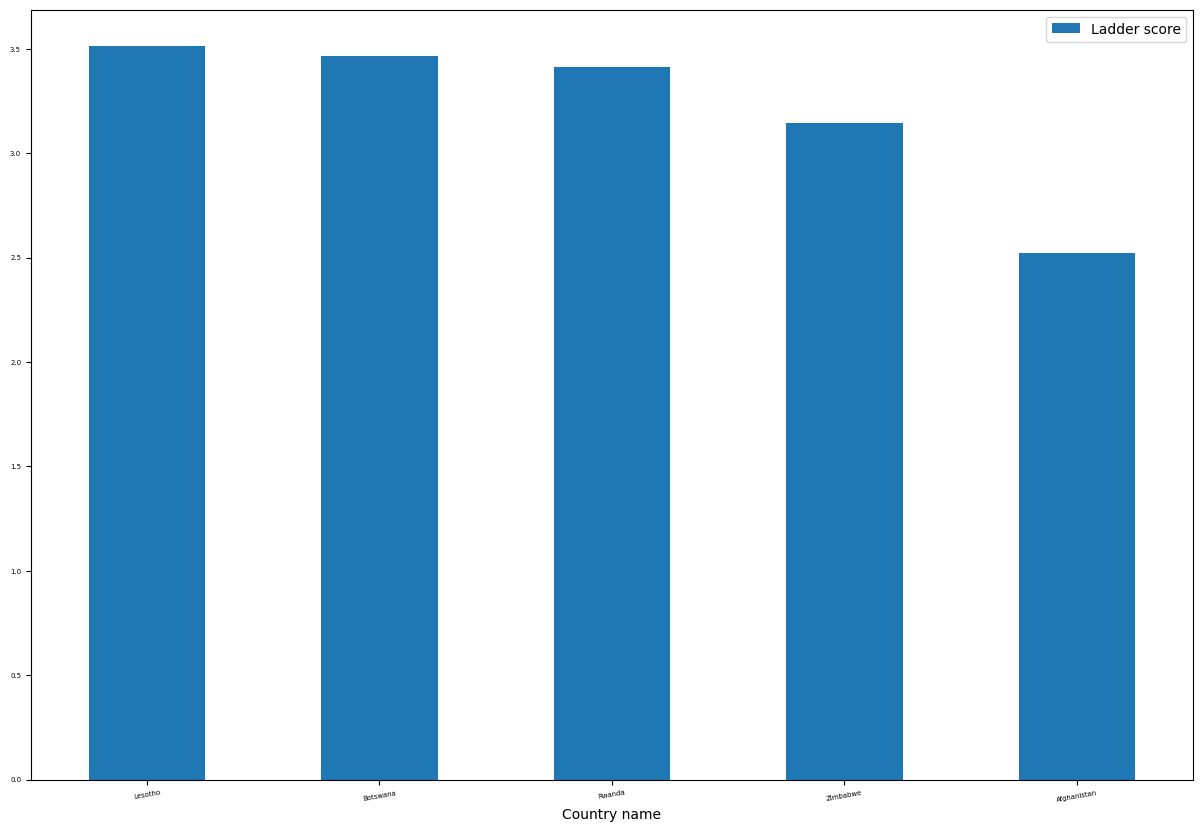

In [102]:
#Bar Chart of the least happy countries:
unhappiest_country_df.tail().plot(x="Country name", y="Ladder score", kind="bar", rot=10, fontsize=5)
plt.savefig("Output_figs/Corruptionbarchart.png")

plt.show()

### What is the happiest continent?

In [103]:
# Code Happiest Continent
happiest_continent = happiness_data_2021.copy()
happiest_continent_df = pd.DataFrame(happiest_continent)
happiest_continent_clean_df = happiest_continent_df.iloc[:,[0,2]].copy()
happiest = happiest_continent_df.loc[happiest_continent_df["Ladder score"].idxmax()]
happiest = happiest['Regional indicator']
print(f" The happiest continent in the world is {happiest}")
happiest_continent_clean_df.head()


list_ten_RegionalIndicator = happiness_data_2021.sort_values(by = 'Ladder score')
list_ten_RegionalIndicator.head(10)

 The happiest continent in the world is Western Europe


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
143,Malawi,Sub-Saharan Africa,3.600,0.092,3.781,3.419,6.958,0.537,57.948,0.780,0.038,0.729,2.43,0.113,0.168,0.298,0.484,0.213,0.134,2.190
142,Haiti,Latin America and Caribbean,3.615,0.173,3.953,3.276,7.477,0.540,55.700,0.593,0.422,0.721,2.43,0.294,0.173,0.227,0.257,0.463,0.139,2.060
141,Tanzania,Sub-Saharan Africa,3.623,0.071,3.762,3.485,7.876,0.702,57.999,0.833,0.183,0.577,2.43,0.433,0.540,0.300,0.549,0.307,0.231,1.263
140,Yemen,Middle East and North Africa,3.658,0.070,3.794,3.521,7.578,0.832,57.122,0.602,-0.147,0.800,2.43,0.329,0.831,0.272,0.268,0.092,0.089,1.776
139,Burundi,Sub-Saharan Africa,3.775,0.107,3.985,3.565,6.635,0.490,53.400,0.626,-0.024,0.607,2.43,0.000,0.062,0.155,0.298,0.172,0.212,2.876


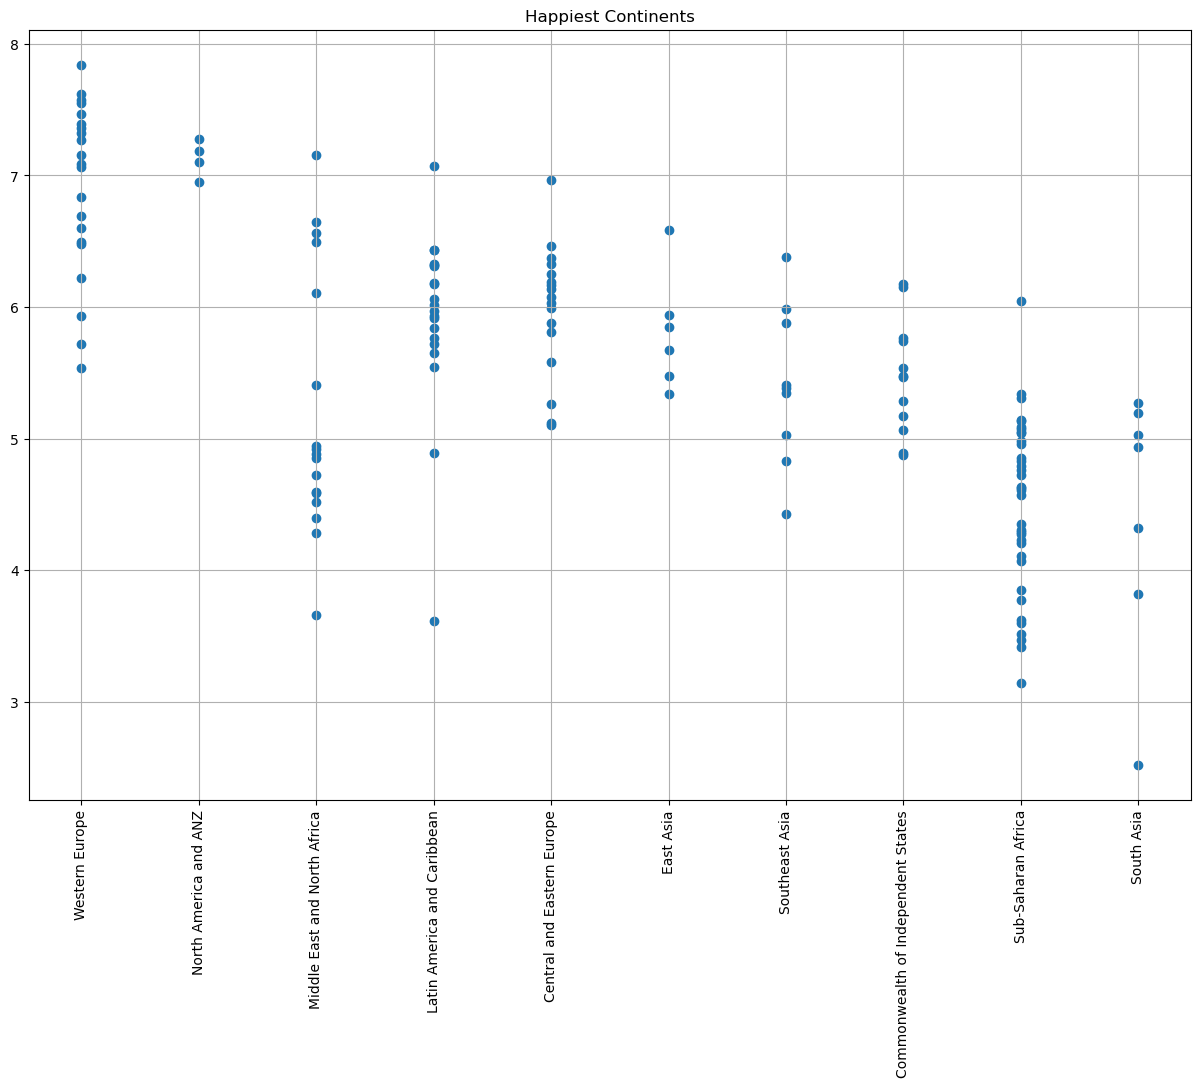

In [104]:
#Graph of least happy continents
plt.scatter(happiest_continent_df['Regional indicator'],happiest_continent_df['Ladder score'])

dpi=(30,15)
plt.title("Happiest Continents")
plt.xticks(rotation=90)
plt.grid()

plt.show()

### What is the least happy continent?

In [105]:
data_mean = happiness_data_2021.groupby(['Regional indicator'])[['Ladder score']].mean()

data_mean.sort_values(by = 'Ladder score', ascending = True)

,Ladder score
Regional indicator,
South Asia,4.441857
Sub-Saharan Africa,4.494472
Middle East and North Africa,5.219765
Southeast Asia,5.407556
Commonwealth of Independent States,5.467000
East Asia,5.810333
Latin America and Caribbean,5.908050
Central and Eastern Europe,5.984765
Western Europe,6.914905


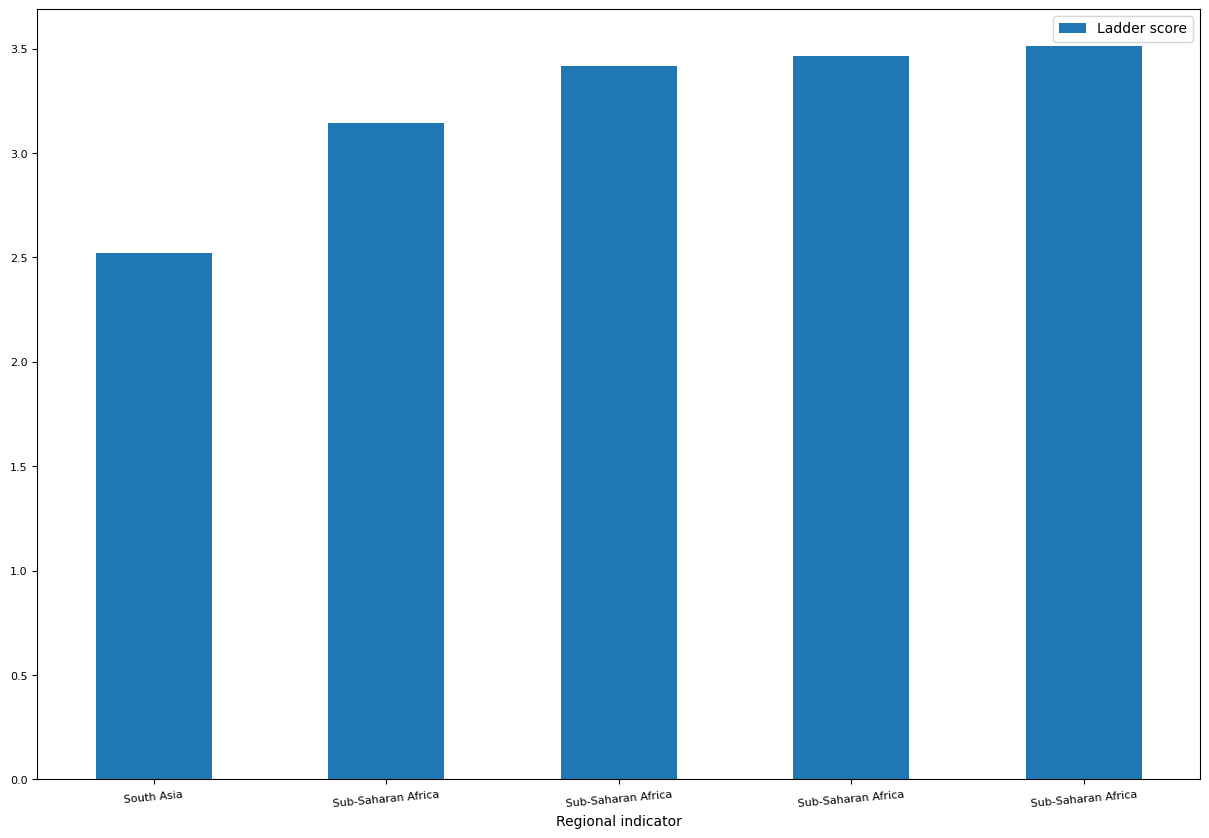

In [122]:
#Bar Graph of least happy continents

least_happy_df = happiest_country_clean_df.sort_values('Ladder score', ascending=True).head()

least_happy_df.plot(x="Regional indicator", y="Ladder score", kind="bar", rot=5, fontsize=8)

plt.show()

### Is there a correlation between happiness and freedom to make life choices?

In [107]:
# Code here, linear regress/line plot?

freedom_df = happiness_2021_df.loc[happiness_2021_df['Freedom to make life choices'].idxmax()]

freedom_mean = happiness_2021_df['Freedom to make life choices'].mean()

freedom_median = happiness_2021_df['Freedom to make life choices'].median()

freedom_df = freedom_df['Country name']

print(f"The country with the highest freedom to make life choices in the world is {freedom_df}.")
print(f"The mean and meadian freedom to make life choices scores are {freedom_mean} and {freedom_median} respectively")


The country with the highest freedom to make life choices in the world is Uzbekistan.
The mean and meadian freedom to make life choices scores are 0.7915973154362417 and 0.804 respectively


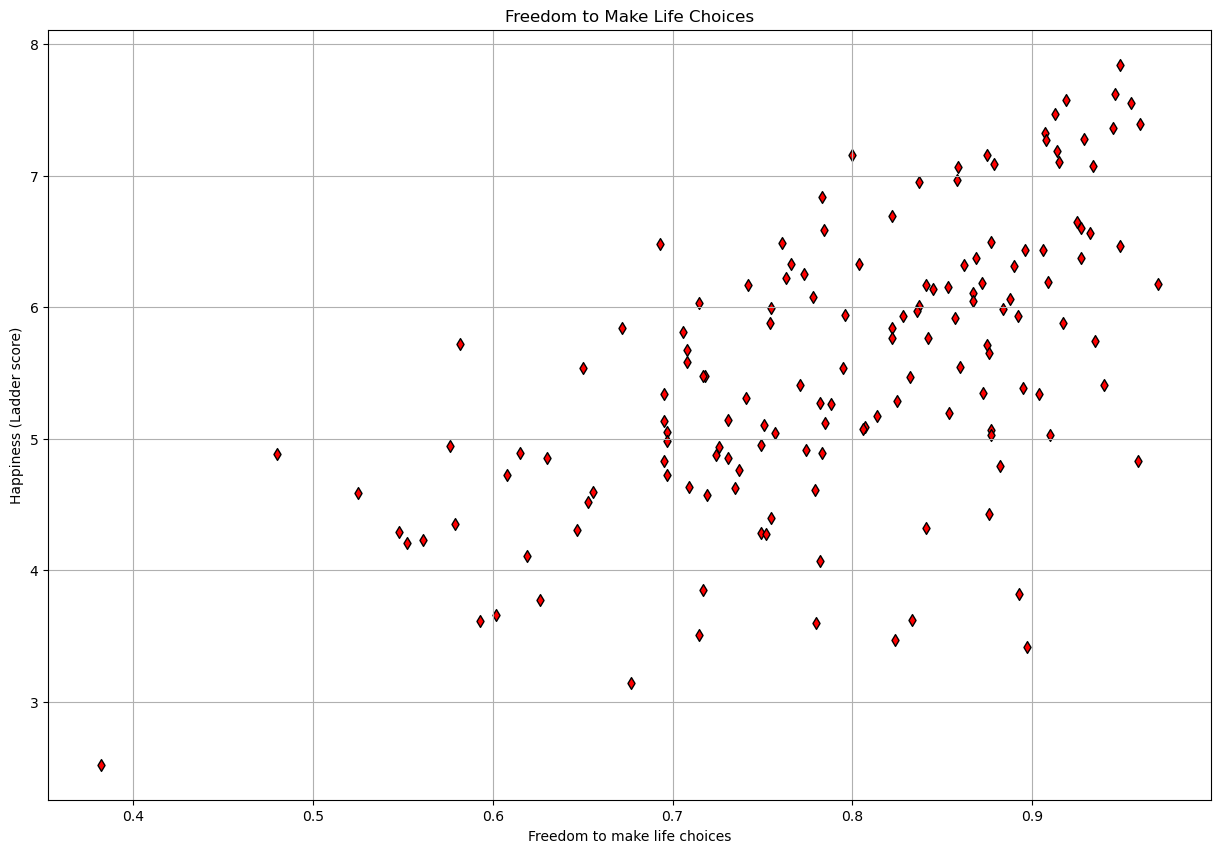

In [108]:
plt.scatter(happiness_2021_df["Freedom to make life choices"],happiness_2021_df["Ladder score"],linewidth=1,marker="d",facecolor="red",edgecolor="black")

plt.title("Freedom to Make Life Choices")
plt.ylabel("Happiness (Ladder score)")
plt.xlabel("Freedom to make life choices")

plt.grid()

plt.show()

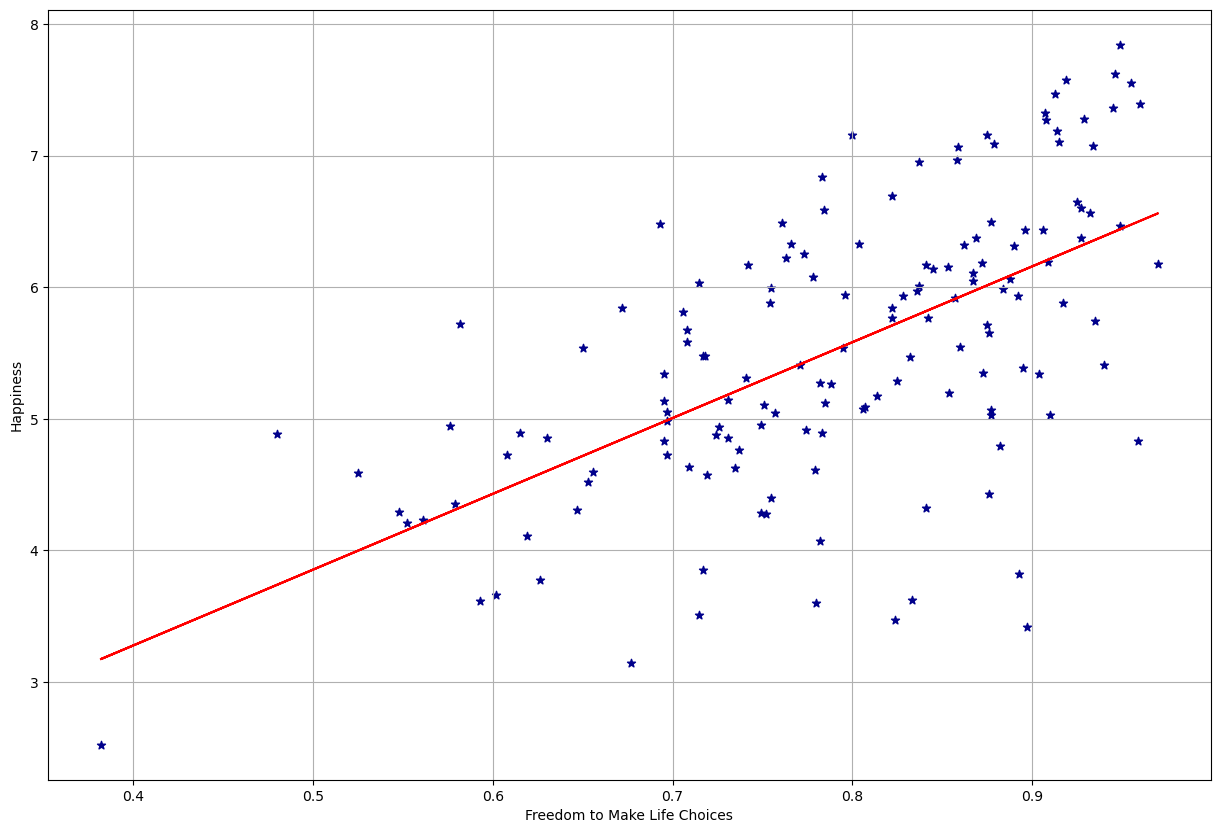

<Figure size 800x1200 with 0 Axes>

In [109]:
x_values = happiness_2021_df['Freedom to make life choices']
y_values = happiness_2021_df['Ladder score']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,marker="*",facecolor="darkblue")
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel("Happiness")
plt.grid()
plt.figure(figsize=(8,12))
plt.show()

### Is there a correlation between happiness and GDP?

In [110]:
happiness_data_2021 = happiness_data_2021.drop(columns='Explained by: Log GDP per capita')
happiness_data_2021 = happiness_data_2021.drop(columns='Explained by: Social support')
happiness_data_2021 = happiness_data_2021.drop(columns='Explained by: Healthy life expectancy')
happiness_data_2021 = happiness_data_2021.drop(columns='Explained by: Freedom to make life choices')
happiness_data_2021 = happiness_data_2021.drop(columns='Explained by: Generosity')
happiness_data_2021 = happiness_data_2021.drop(columns='Explained by: Perceptions of corruption')
happiness_data_2021 = happiness_data_2021.drop(columns='Ladder score in Dystopia')

/var/folders/p2/2sz238yx2tjcxrfl2qyhd9980000gn/T/ipykernel_31474/3194490468.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(happiness_data_2021.corr(), cmap = 'Greens', annot = True)


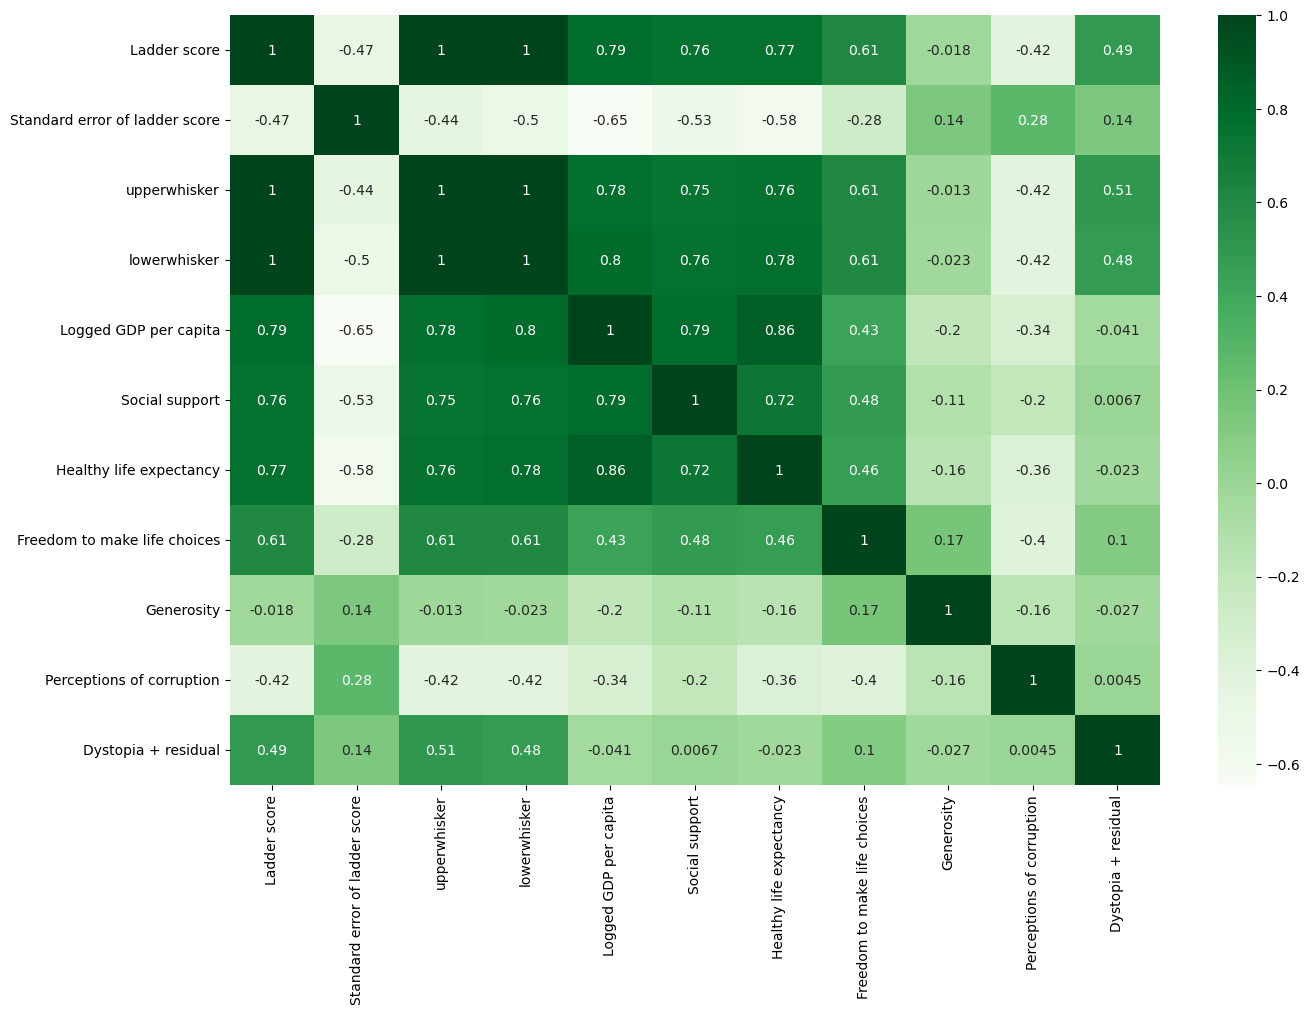

In [111]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(happiness_data_2021.corr(), cmap = 'Greens', annot = True)

plt.show()

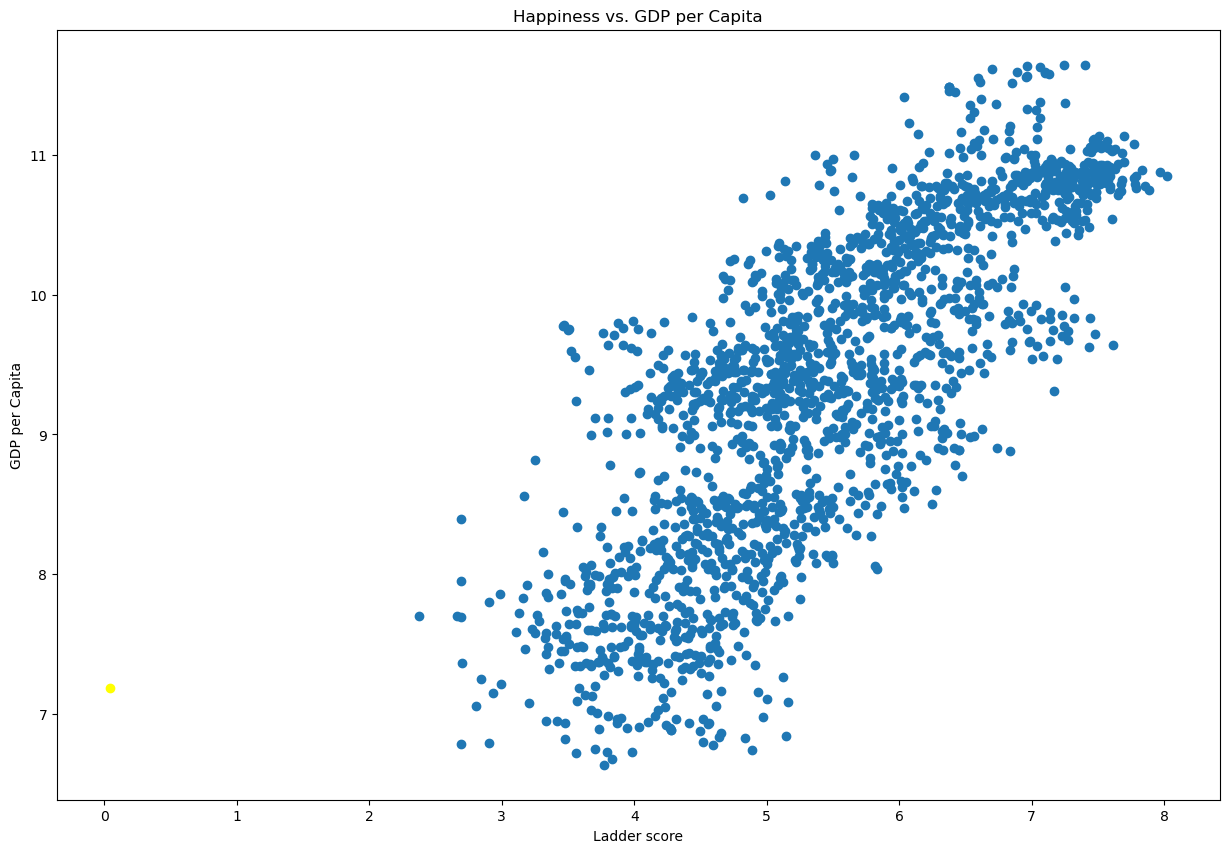

In [112]:
x_axis = happiness_df['Life Ladder']
y_axis = happiness_df['Log GDP per capita']
x2_axis = happiness_data_2021.iloc[10,3]
y2_axis = happiness_data_2021.iloc[10,2]
plt.scatter(x_axis, y_axis)
plt.scatter(x2_axis, y2_axis, color="yellow")
plt.title('Happiness vs. GDP per Capita')
plt.xlabel('Ladder score')
plt.ylabel('GDP per Capita')
plt.show()

### Is there a correlation between happiness and generosity?

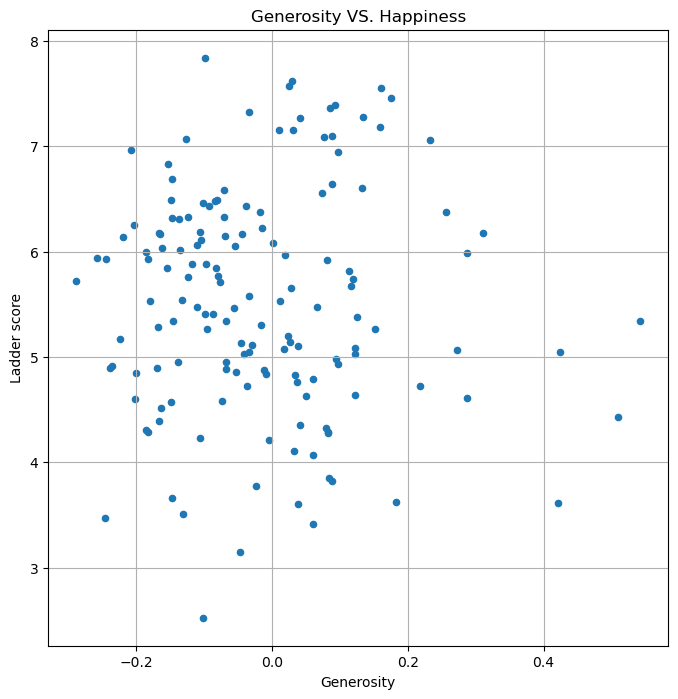

In [113]:
happiness_data_2021.plot(kind="scatter", x= "Generosity", y="Ladder score", grid = True, figsize=(8,8),
        title="Generosity VS. Happiness")
                     
plt.show()

The r-value is: -0.017799
 y = -0.12687827965308107 x + 5.530918721338137


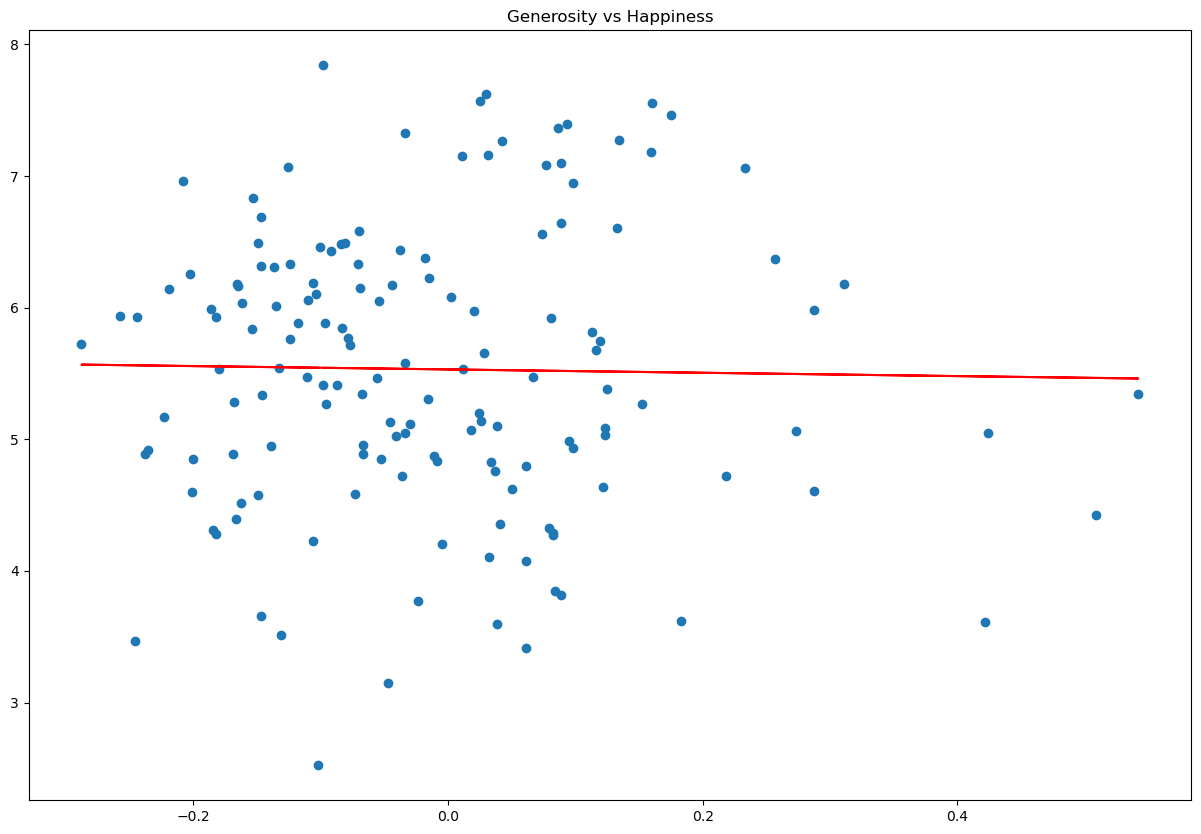

In [114]:
x_values_generosity = happiness_data_2021['Generosity']
y_values_ladderscore = happiness_data_2021['Ladder score']

res = (linregress(x_values_generosity, y_values_ladderscore))

print(f"The r-value is: {res.rvalue:.6f}")
print(f" y = {res.slope} x + {res.intercept}")

plot_linear_regression(x_values_generosity,
                      y_values_ladderscore,
                      'Generosity vs Happiness',
                      'Max Ladder score', (15,30))

plt.show()

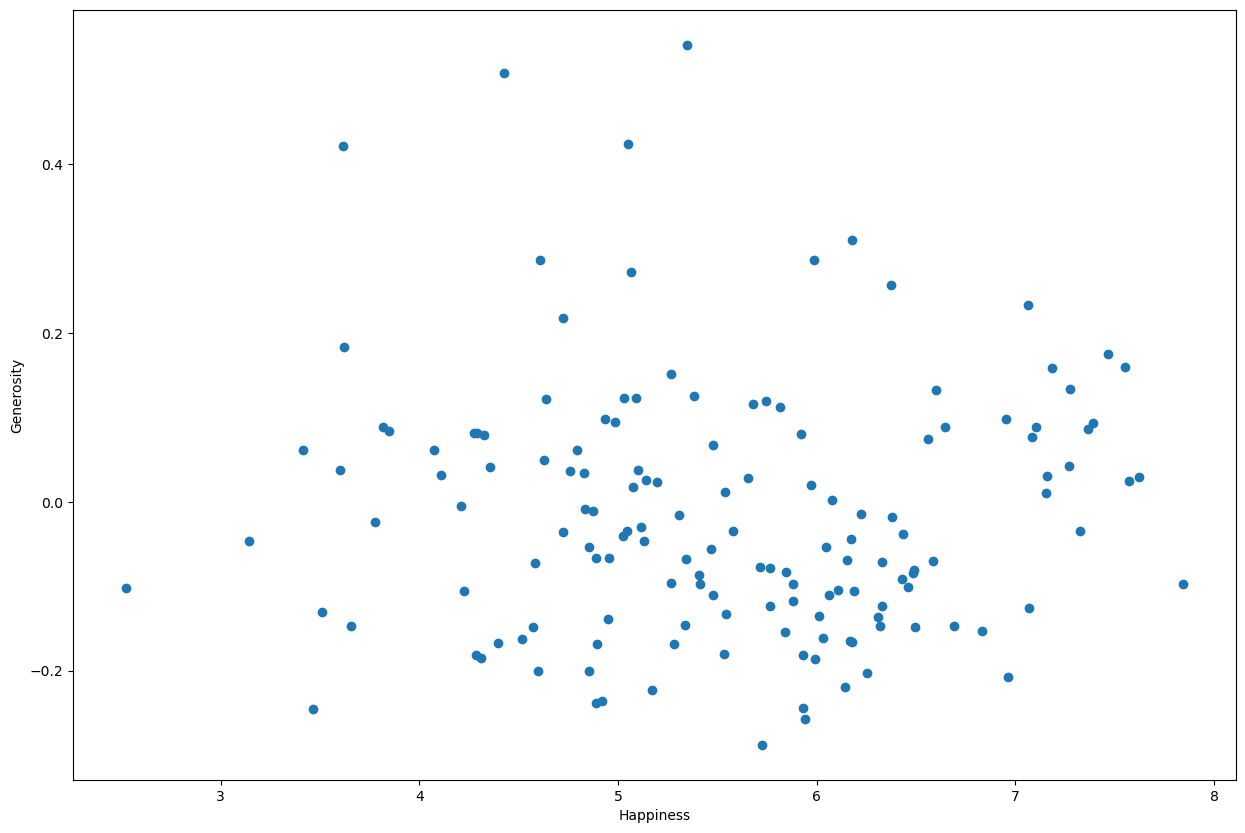

In [115]:
Ladderscore = happiness_data_2021["Ladder score"]
Generosity = happiness_data_2021["Generosity"]
plt.scatter(Ladderscore, Generosity)
plt.xlabel("Happiness")
plt.ylabel("Generosity")
plt.show()

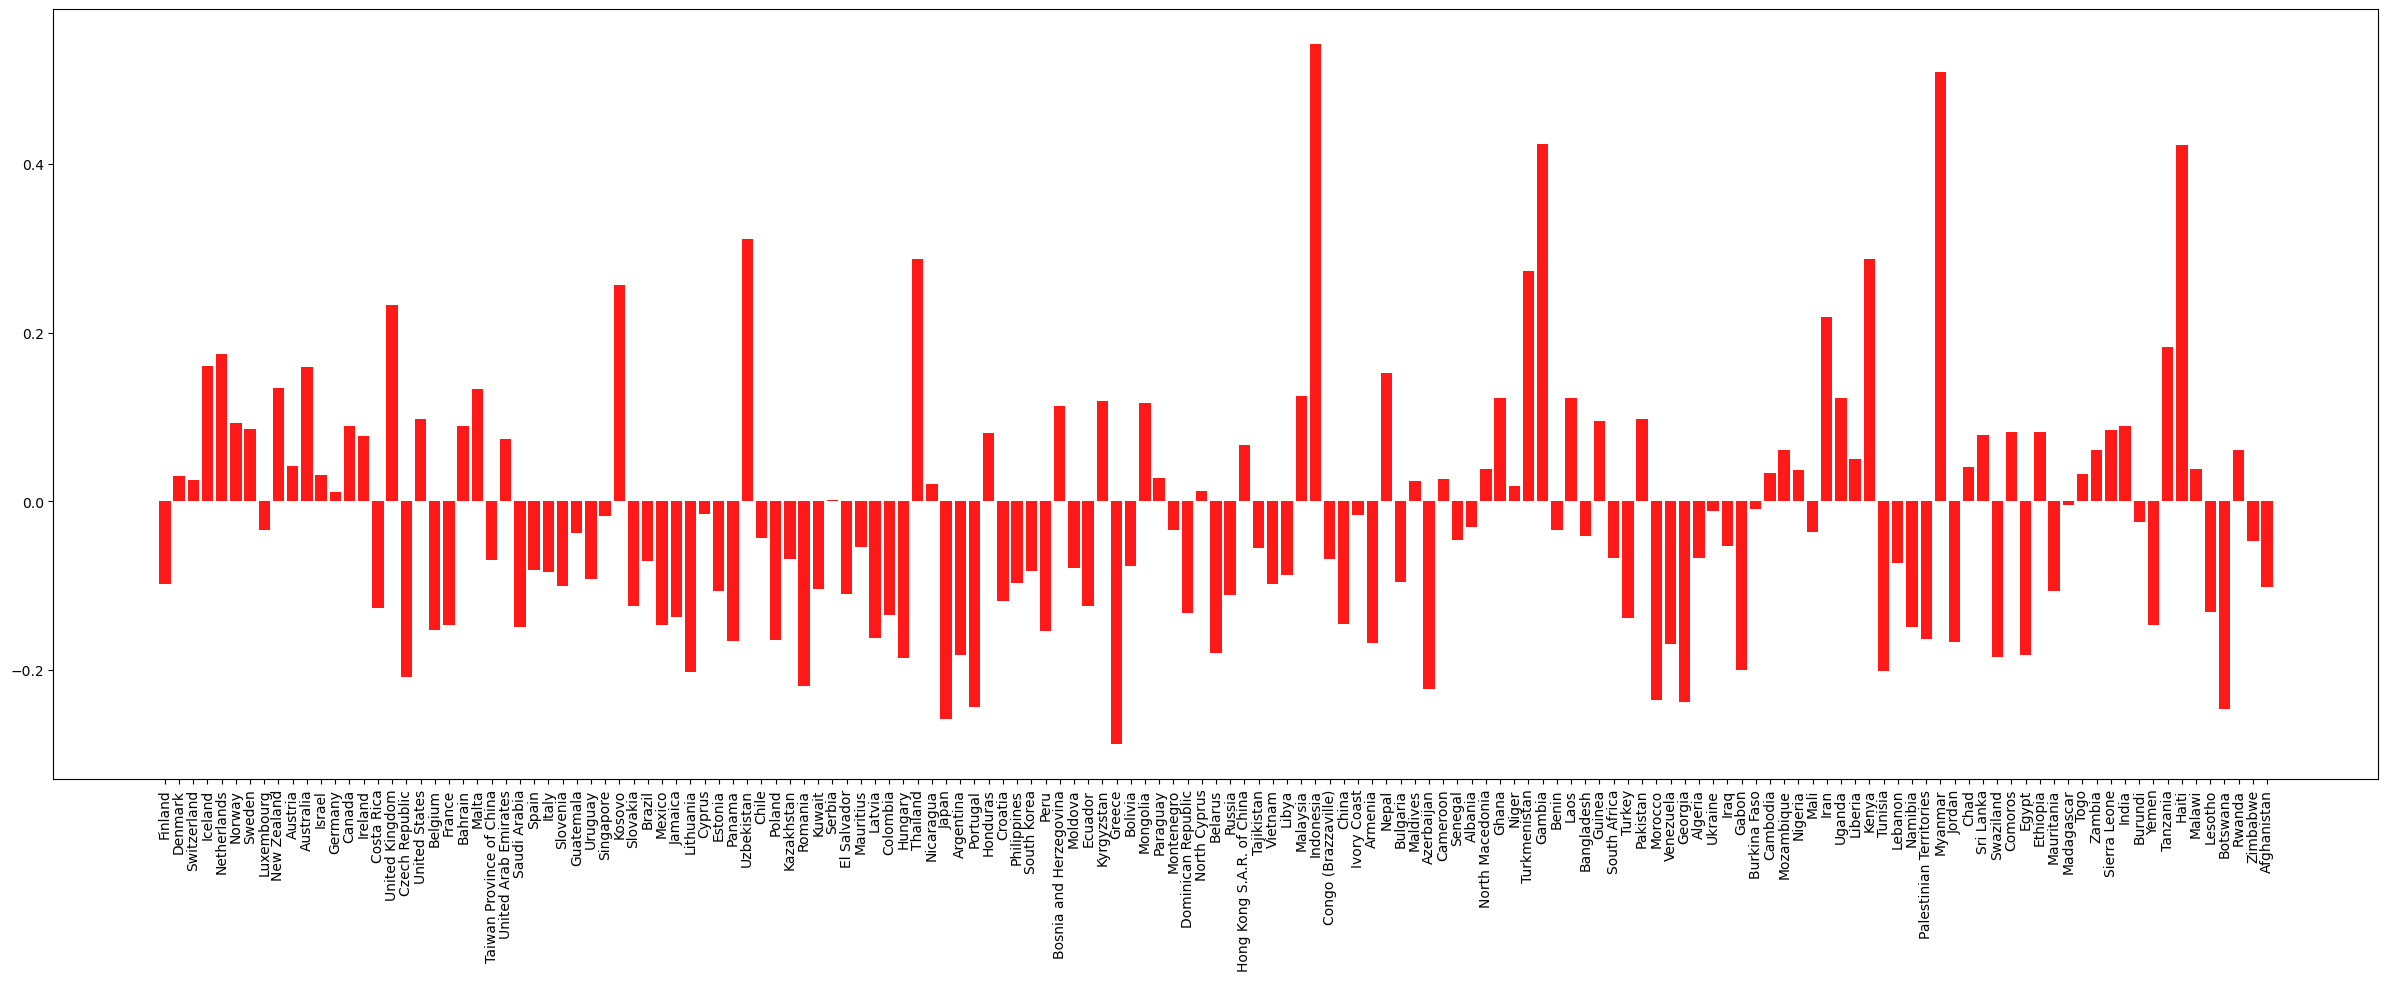

In [116]:
x_axis = happiness_data_2021["Country name"]
tick_locations = range(len(x_axis))
plt.figure(figsize=(30,10))
plt.bar(x_axis,  happiness_data_2021["Generosity"], color="r", alpha=0.9, align= "center")
plt.xticks(tick_locations, happiness_data_2021["Country name"], rotation="vertical")
plt.show()

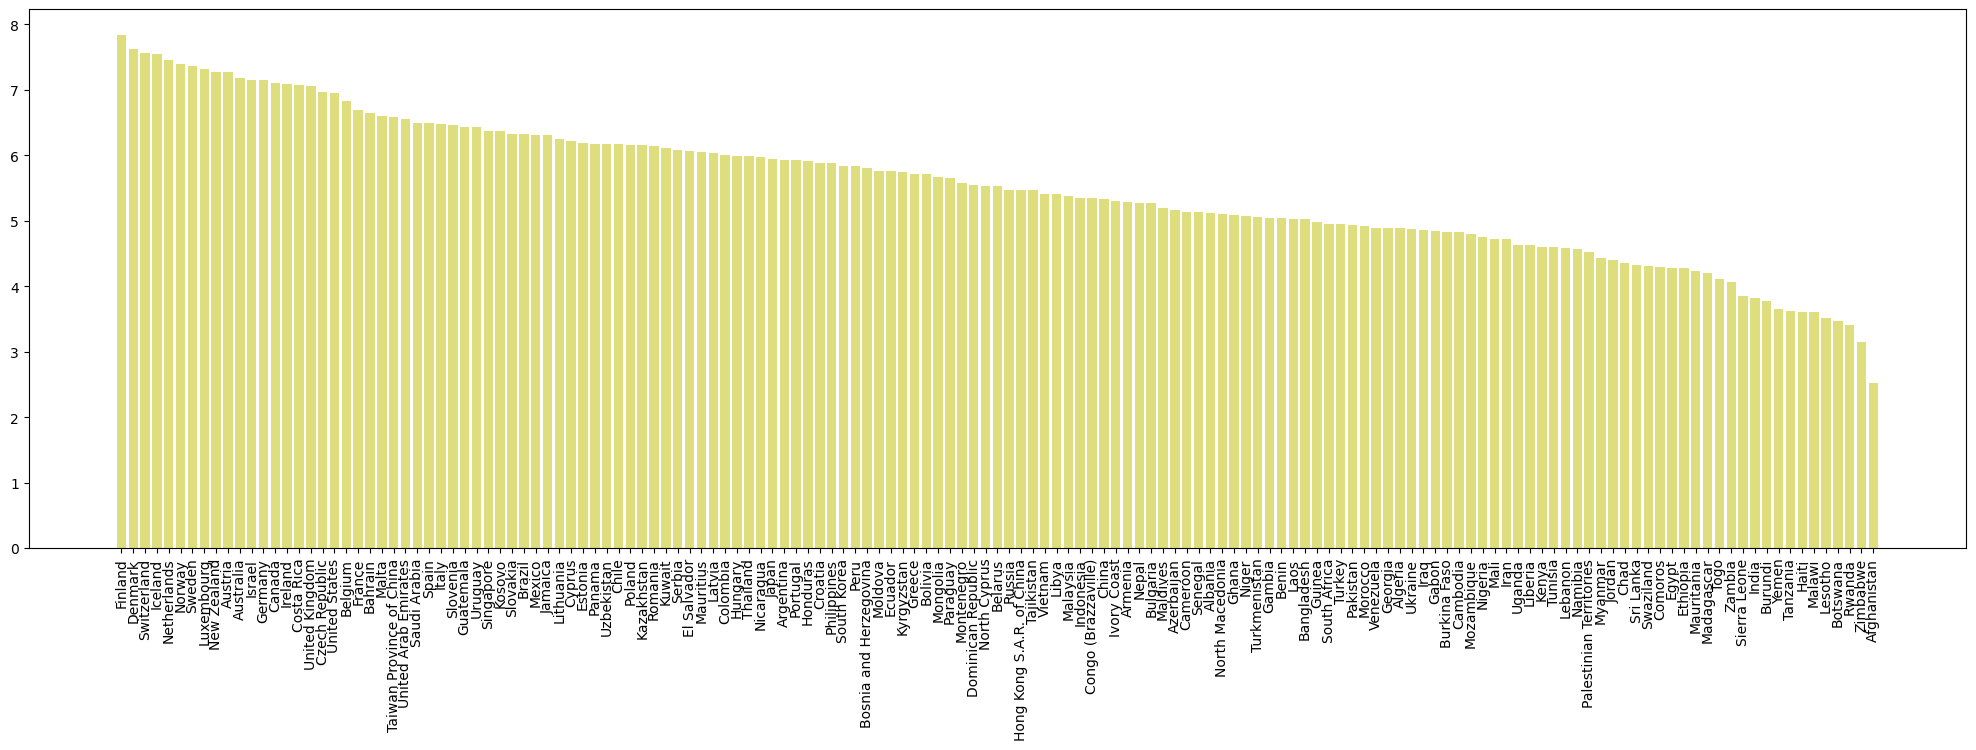

In [117]:
x_axis = happiness_data_2021["Country name"]
tick_locations = range(len(x_axis))
plt.figure(figsize=(25,7))
plt.bar(x_axis, happiness_data_2021["Ladder score"], color="y", alpha=0.5, align= "center")
plt.xticks(tick_locations, happiness_data_2021["Country name"], rotation="vertical")
plt.show()

### Is there a correlation between happiness and social support?

### Is there a correlation between happiness and perception of corruption?

In [118]:
# Code here, linear regress/line plot?

corruption = happiness_2021_df.copy()
corruption_df = pd.DataFrame(corruption)

corruption_clean_df = corruption_df.iloc[:,[0,1,11,2]].copy()

corrupt = corruption_clean_df.loc[corruption_clean_df['Perceptions of corruption'].idxmax()]

corrupt_mean = corruption_clean_df['Perceptions of corruption'].mean()


corrupt_median = corruption_clean_df['Perceptions of corruption'].median()

corrupt = corrupt['Country name']

print(f"The country with the highest perception of corruption in the world is {corrupt}.")
print(f"The mean and meadian perceptions of corruption scores are {corrupt_mean} and {corrupt_median} respectively")
corruption_clean_df.to_csv('Output_figs/Corruption_df.csv')
corruption_clean_df.sort_values('Perceptions of corruption', ascending=False).head()



The country with the highest perception of corruption in the world is Croatia.
The mean and meadian perceptions of corruption scores are 0.7274496644295303 and 0.781 respectively


,Country name,Regional indicator,Perceptions of corruption,Ladder score
59,Croatia,Central and Eastern Europe,0.939,5.882
45,Romania,Central and Eastern Europe,0.938,6.140
87,Bulgaria,Central and Eastern Europe,0.932,5.266
63,Bosnia and Herzegovina,Central and Eastern Europe,0.931,5.813
148,Afghanistan,South Asia,0.924,2.523


In [119]:
plt.figure(figsize=[10,4])
plt.title("Perception of Corruption Vs Happinesss")
plt.scatter(corruption_clean_df["Perceptions of corruption"], corruption_clean_df["Ladder score"], linewidth=1, edgecolor="black")
plt.ylabel("Happiness (Ladder Score)")
plt.xlabel("Perceptions of Corruption")
plt.grid()


plt.savefig("Output_figs/Corruptionfig.png")

The r-value is: -0.421140
 y = -2.5234695955775135 x + 7.368536036675482


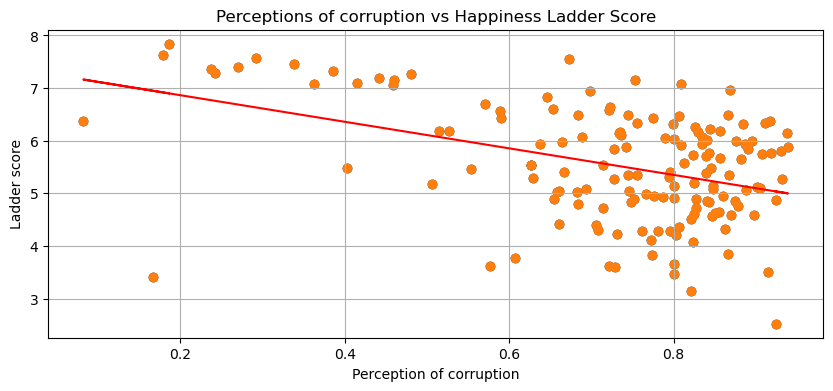

In [120]:
x_values = corruption_clean_df["Perceptions of corruption"]
y_values = corruption_clean_df["Ladder score"]

res = (linregress(x_values, y_values))

print(f"The r-value is: {res.rvalue:.6f}")
print(f" y = {res.slope} x + {res.intercept}")

plt.savefig('Output_figs/CorruptionRegression.png')

plot_linear_regression(x_values,
                       y_values,
                       'Perceptions of corruption vs Happiness Ladder Score',
                       'Max Ladder score', (15,50))


plt.ylabel("Ladder score")
plt.xlabel("Perception of corruption")
plt.savefig("Output_figs/CorruptionRegression.png", dpi = 200)
plt.show()  

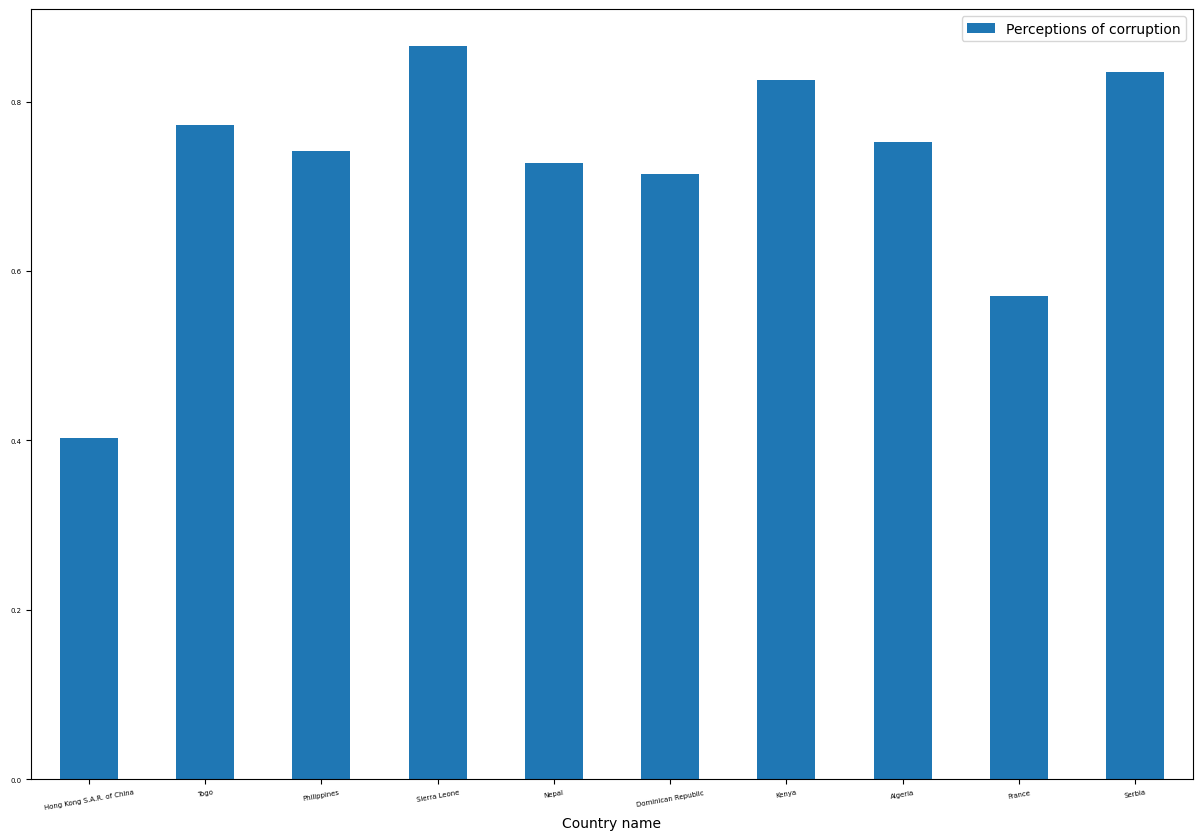

In [121]:
corruption_country_plot = corruption_clean_df.sort_values('Perceptions of corruption', ascending=False).sample(10)

corruption_country_plot.plot(x="Country name", y="Perceptions of corruption", kind="bar", rot=10, fontsize=5)
plt.savefig("Output_figs/Corruptionbarchart.png")

plt.show()

# Project 1 Conclusions:

---

## Based upon this data, the following conclusions can be drawn:
#### The happiest country is located in the happiest continent (Finland and Western Europe respectively). We can also determine that based on this data there are likely correlations between GDP and Happiness, Perceptions of corruptions and happiness. While continents are not a direct indicator of happiness, it does appear that there is likely a correlation here as well. It was interesting to note that all factors aside, the general ladder score, or general happiness, was largely densely populated around the mean and median, indicating a more consistent and happier populace than anticipated. Counterintuitive to what might be assumed, in this data set as generosity increased, happiness decreased. It should be noted this correlation was not a strong one, so this could be due to sampling error. 

